In [360]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

In [361]:
start_date = '2020-01-01'

In [362]:
# read and load the csv files
df_fred_with_nas = pd.read_csv("light_data/fred_data_nas.csv")
total_out_BTC_USD = pd.read_csv("light_data/total_out_BTC_USD.csv")
df_all_exchanges_volume = pd.read_csv("light_data/df_all_exchanges_volume.csv")
df_cumsum_supply_BTC_usd = pd.read_csv("light_data/df_cumsum_supply_BTC_usd.csv")

total_out_BTC_USD.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_cumsum_supply_BTC_usd.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_cumsum_supply_BTC_usd.index = df_cumsum_supply_BTC_usd["Date"]
df_fred_with_nas.rename(columns={"date": "Date"}, inplace=True)


total_out_BTC_USD = total_out_BTC_USD[total_out_BTC_USD["Date"] >= start_date]
df_all_exchanges_volume = df_all_exchanges_volume[df_all_exchanges_volume["Date"] >= start_date]
df_cumsum_supply_BTC_usd = df_cumsum_supply_BTC_usd[df_cumsum_supply_BTC_usd["Date"] >= start_date]
df_fred_with_nas = df_fred_with_nas[df_fred_with_nas["Date"] >= start_date]

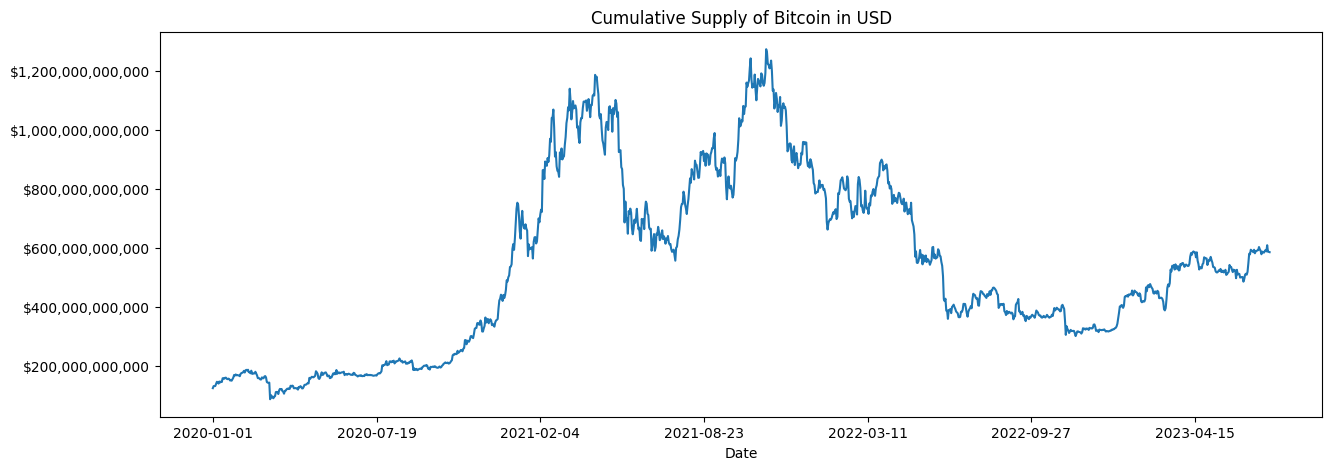

In [363]:
df_cumsum_supply_BTC_usd["cumsum_supply_usd"].plot(x="Date", y="Total SupplyC", figsize=(15, 5))
ax = plt.gca()
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.title("Cumulative Supply of Bitcoin in USD")
plt.show()

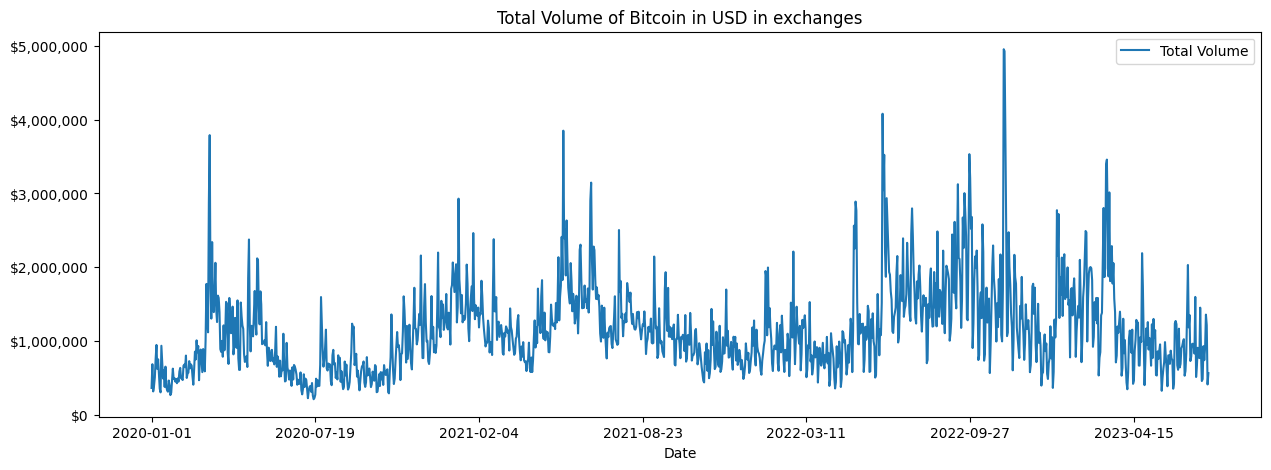

In [364]:
df_all_exchanges_volume.plot(x="Date", y="Total Volume", figsize=(15, 5))
ax = plt.gca()
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.title("Total Volume of Bitcoin in USD in exchanges")
plt.show()


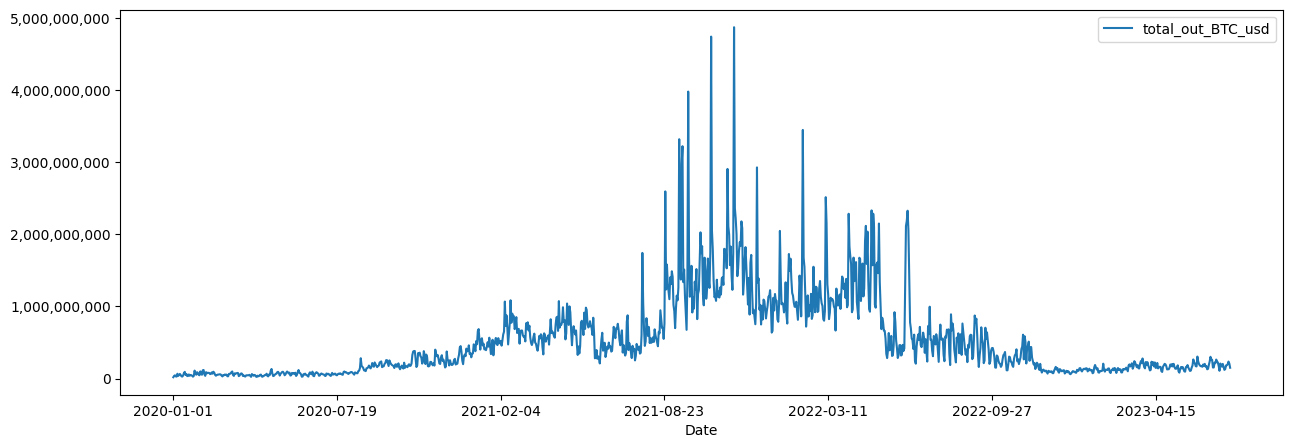

In [365]:
total_out_BTC_USD.plot(x="Date", y="total_out_BTC_usd", figsize=(15, 5))
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()


# Devide volume of exchanges and volume in blockchain by the total supply of BTC in USD

In [366]:
df_cumsum_supply_BTC_usd

,Date,cumsum_supply_usd
Date,,
2020-01-01,2020-01-01,1.261638e+11
2020-01-02,2020-01-02,1.331146e+11
2020-01-03,2020-01-03,1.333580e+11
2020-01-04,2020-01-04,1.334351e+11
2020-01-05,2020-01-05,1.407267e+11
...,...,...
2023-07-11,2023-07-11,5.894394e+11
2023-07-12,2023-07-12,6.104178e+11
2023-07-13,2023-07-13,5.882786e+11


In [367]:
total_out_BTC_USD.set_index("Date", inplace=True)
total_out_BTC_USD

,total_out_BTC_usd
Date,
2020-01-01,1.783297e+07
2020-01-02,3.627752e+07
2020-01-03,4.436481e+07
2020-01-04,2.890741e+07
2020-01-05,2.692596e+07
...,...
2023-07-11,1.835730e+08
2023-07-12,1.975522e+08
2023-07-13,2.349778e+08


In [368]:
df_all_exchanges_volume.set_index("Date", inplace=True)
df_all_exchanges_volume

,Total Volume
Date,
2020-01-01,3.666107e+05
2020-01-02,6.885177e+05
2020-01-03,3.201250e+05
2020-01-04,3.967684e+05
2020-01-05,5.100476e+05
...,...
2023-07-11,9.181128e+05
2023-07-12,1.359784e+06
2023-07-13,1.217362e+06


<Axes: xlabel='Date'>

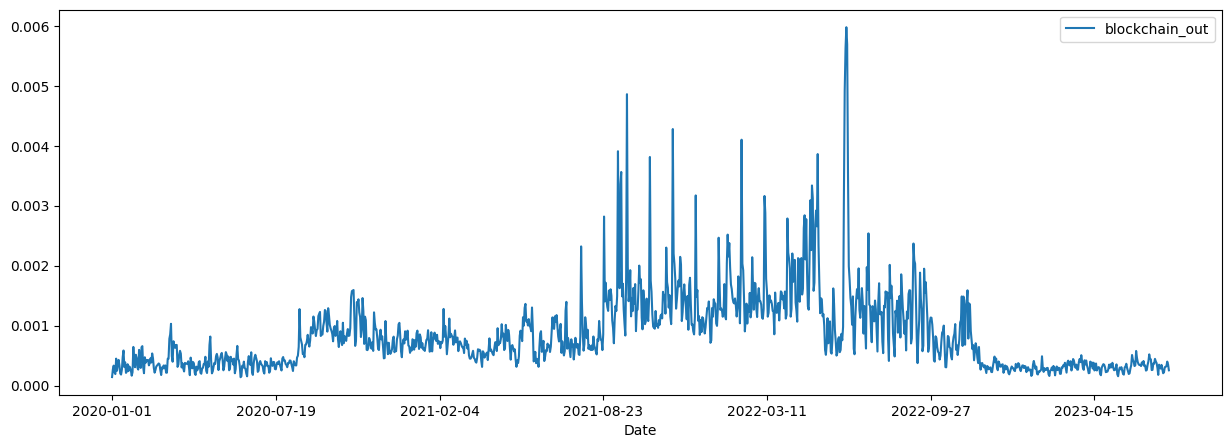

In [369]:
total_out_BTC_USD_by_btc_supply = total_out_BTC_USD["total_out_BTC_usd"]/df_cumsum_supply_BTC_usd["cumsum_supply_usd"]

total_out_BTC_USD_by_btc_supply = pd.DataFrame(total_out_BTC_USD_by_btc_supply, columns=["blockchain_out"])
total_out_BTC_USD_by_btc_supply.plot(figsize=(15, 5))

<Axes: xlabel='Date'>

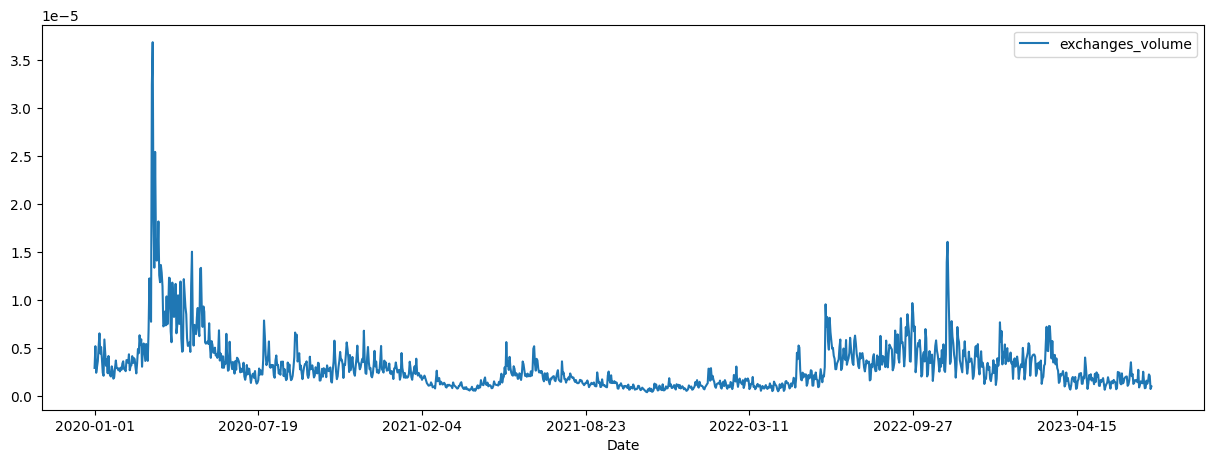

In [370]:
df_all_exchanges_volume_by_btc_supply = df_all_exchanges_volume["Total Volume"]/df_cumsum_supply_BTC_usd["cumsum_supply_usd"]
df_all_exchanges_volume_by_btc_supply = pd.DataFrame(df_all_exchanges_volume_by_btc_supply, columns=["exchanges_volume"])
df_all_exchanges_volume_by_btc_supply.plot(figsize=(15, 5))


# Merge the data

In [371]:
df_agregated = df_fred_with_nas.copy()
df_agregated = df_agregated.merge(total_out_BTC_USD_by_btc_supply, on="Date", how="left")
df_agregated = df_agregated.merge(df_all_exchanges_volume_by_btc_supply, on="Date", how="left")
df_agregated.dropna(inplace=True)
df_agregated.index = df_agregated["Date"]
df_agregated

,Date,2yr_yield,10yr_3mo_spread,10yr_inflation,usd_index,sp500,btc_price,blockchain_out,exchanges_volume
Date,,,,,,,,,
2020-01-02,2020-01-02,1.58,0.34,1.80,114.9778,3257.85,6945.01,0.000273,5.172367e-06
2020-01-03,2020-01-03,1.53,0.28,1.77,114.9895,3234.85,7335.54,0.000333,2.400493e-06
2020-01-06,2020-01-06,1.54,0.25,1.75,114.9588,3246.28,7773.48,0.000449,5.172019e-06
2020-01-07,2020-01-07,1.54,0.29,1.74,115.1501,3237.18,8169.95,0.000247,6.509123e-06
2020-01-08,2020-01-08,1.58,0.33,1.75,115.1354,3253.05,8035.08,0.000350,4.402928e-06
...,...,...,...,...,...,...,...,...,...
2023-07-10,2023-07-10,4.85,-1.47,2.25,119.4908,4409.53,30427.52,0.000306,1.250343e-06
2023-07-11,2023-07-11,4.88,-1.50,2.24,119.2556,4439.26,30636.22,0.000311,1.557603e-06
2023-07-12,2023-07-12,4.72,-1.61,2.26,118.1838,4472.16,30379.01,0.000324,2.227628e-06


# Verify stationarity and Diff for non stationary series

In [372]:
def test_stationarity(series):
    result = adfuller(series)
    p_value = result[1]
    
    if p_value <= 0.05:
        print("A série é estacionária.")
        return True
    else:
        print("A série não é estacionária.")
        return False

In [373]:
df_fed_stationary = pd.DataFrame()
df_fed_stationary.index= df_agregated["Date"]
for col in df_agregated.columns:
    if col != "Date":
        print(col)
        result = test_stationarity(df_agregated[col])
        if result:
            df_fed_stationary[col] = df_agregated[col]
        else:
            df_fed_stationary[f"{col}_diff"] = df_agregated[col].diff()
df_fed_stationary.dropna(inplace=True)
df_fed_stationary


2yr_yield
A série não é estacionária.
10yr_3mo_spread
A série não é estacionária.
10yr_inflation
A série não é estacionária.
usd_index
A série não é estacionária.
sp500
A série não é estacionária.
btc_price
A série não é estacionária.
blockchain_out
A série não é estacionária.
exchanges_volume
A série é estacionária.


,2yr_yield_diff,10yr_3mo_spread_diff,10yr_inflation_diff,usd_index_diff,sp500_diff,btc_price_diff,blockchain_out_diff,exchanges_volume
Date,,,,,,,,
2020-01-03,-0.05,-0.06,-0.03,0.0117,-23.00,390.53,0.000060,2.400493e-06
2020-01-06,0.01,-0.03,-0.02,-0.0307,11.43,437.94,0.000116,5.172019e-06
2020-01-07,0.00,0.04,-0.01,0.1913,-9.10,396.47,-0.000202,6.509123e-06
2020-01-08,0.04,0.04,0.01,-0.0147,15.87,-134.87,0.000103,4.402928e-06
2020-01-09,0.00,-0.02,-0.01,0.1004,21.65,-221.30,0.000078,5.077770e-06
...,...,...,...,...,...,...,...,...
2023-07-10,-0.09,-0.07,-0.02,-0.1111,10.58,90.19,0.000033,1.250343e-06
2023-07-11,0.03,-0.03,-0.01,-0.2352,29.73,208.70,0.000006,1.557603e-06
2023-07-12,-0.16,-0.11,0.02,-1.0718,32.90,-257.21,0.000012,2.227628e-06


In [374]:
df_var = df_fed_stationary
df_var

,2yr_yield_diff,10yr_3mo_spread_diff,10yr_inflation_diff,usd_index_diff,sp500_diff,btc_price_diff,blockchain_out_diff,exchanges_volume
Date,,,,,,,,
2020-01-03,-0.05,-0.06,-0.03,0.0117,-23.00,390.53,0.000060,2.400493e-06
2020-01-06,0.01,-0.03,-0.02,-0.0307,11.43,437.94,0.000116,5.172019e-06
2020-01-07,0.00,0.04,-0.01,0.1913,-9.10,396.47,-0.000202,6.509123e-06
2020-01-08,0.04,0.04,0.01,-0.0147,15.87,-134.87,0.000103,4.402928e-06
2020-01-09,0.00,-0.02,-0.01,0.1004,21.65,-221.30,0.000078,5.077770e-06
...,...,...,...,...,...,...,...,...
2023-07-10,-0.09,-0.07,-0.02,-0.1111,10.58,90.19,0.000033,1.250343e-06
2023-07-11,0.03,-0.03,-0.01,-0.2352,29.73,208.70,0.000006,1.557603e-06
2023-07-12,-0.16,-0.11,0.02,-1.0718,32.90,-257.21,0.000012,2.227628e-06


# Adjust VAR Model

In [375]:
model = VAR(df_var)
result = model.fit(2)  # 2 é o atraso (número de lags)

print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Nov, 2023
Time:                     18:47:10
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -38.8621
Nobs:                     875.000    HQIC:                  -39.3203
Log likelihood:           7530.26    FPE:                6.31165e-18
AIC:                     -39.6042    Det(Omega_mle):     5.41113e-18
--------------------------------------------------------------------
Results for equation 2yr_yield_diff
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.011699         0.003456            3.385           0.001
L1.2yr_yield_diff               0.012203         0.039384            0.310           0.757
L1.10yr_3mo

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [376]:
# Fazendo previsões para 2 períodos à frente
forecast = result.forecast(df_var.values, steps=2)

# Exibindo as previsões
print("Previsões:")
print(forecast)

Previsões:
[[ 1.41571653e-02  6.38977524e-03  1.27418244e-03  1.59316912e-01
   3.50021874e+00  7.55767794e+01 -6.33954813e-05  1.19833935e-06]
 [ 4.92794093e-03 -2.37822118e-02 -5.01201697e-04 -5.97094995e-02
  -9.00182186e-02 -2.17763489e+02  5.73407400e-05  1.71492823e-06]]


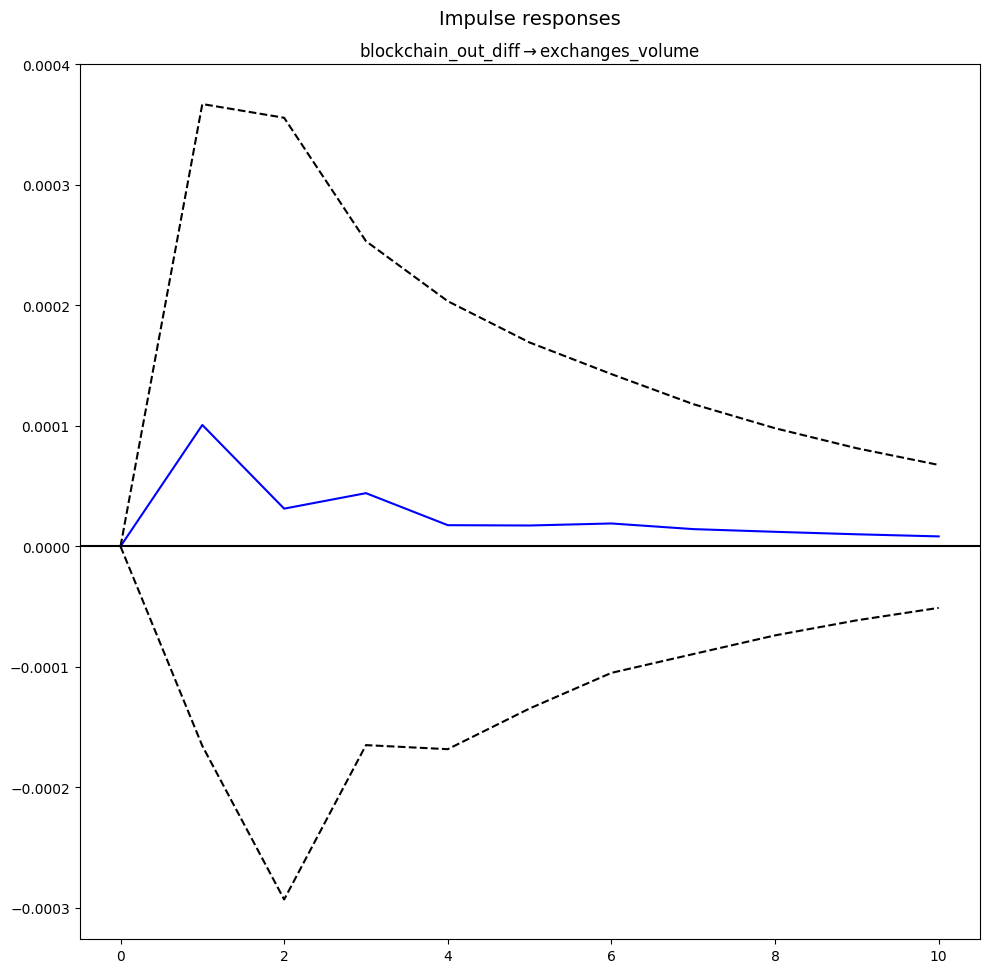

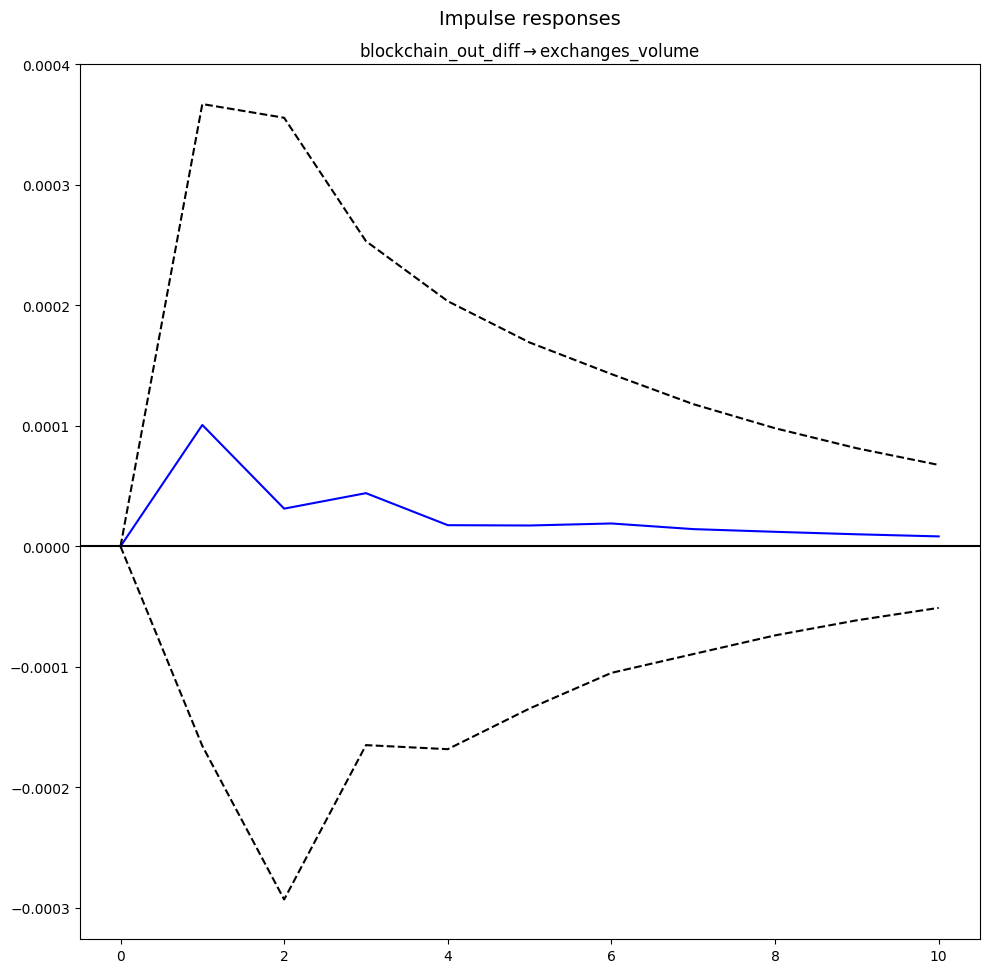

In [377]:
# Analisando o efeito de um choque nas variáveis (por exemplo, um aumento de 10 no PIB)
irf = result.irf(10)
irf.plot(impulse='blockchain_out_diff', response='exchanges_volume')

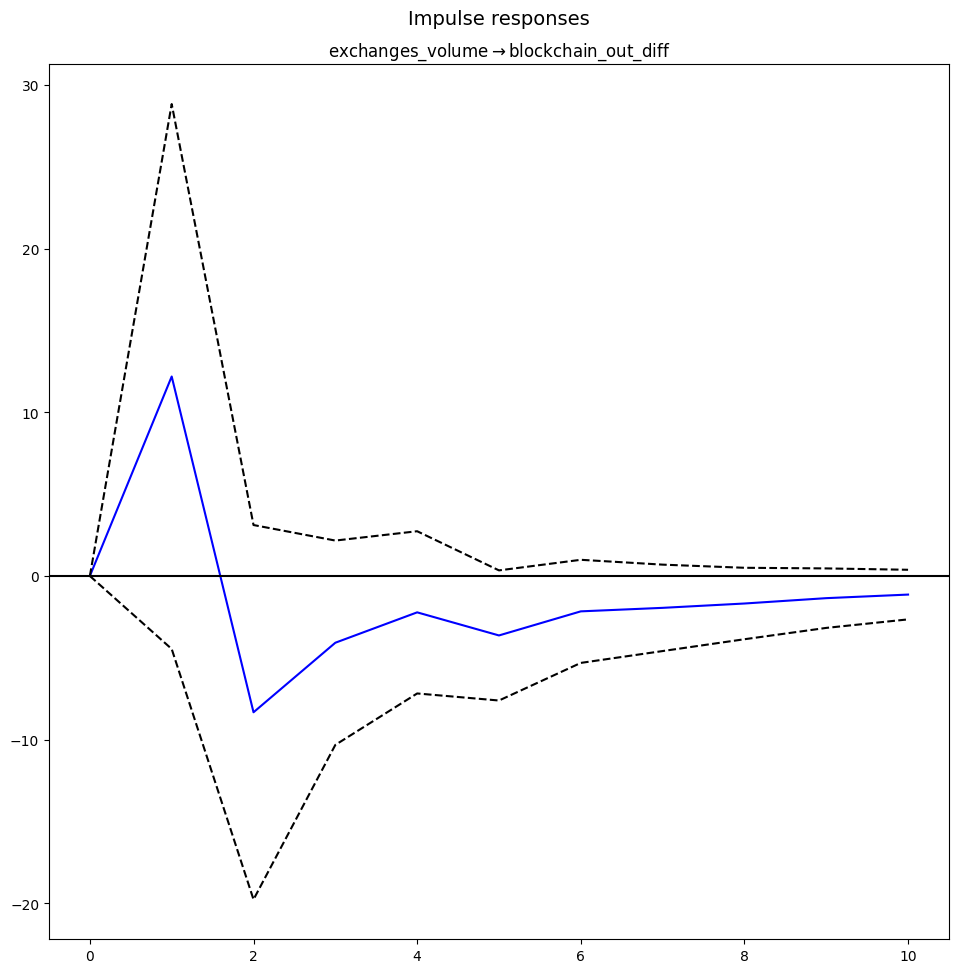

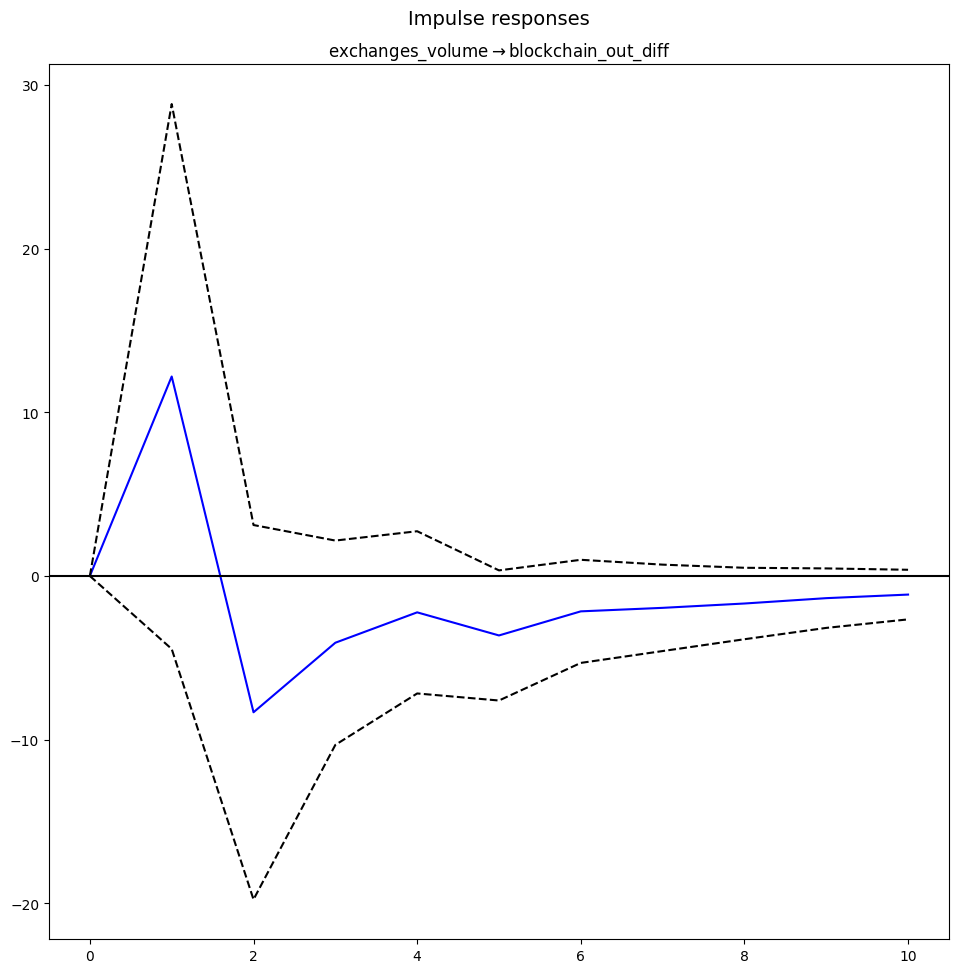

In [378]:
# Analisando o efeito de um choque nas variáveis (por exemplo, um aumento de 10 no PIB)
irf = result.irf(10)
irf.plot(impulse='exchanges_volume', response='blockchain_out_diff')

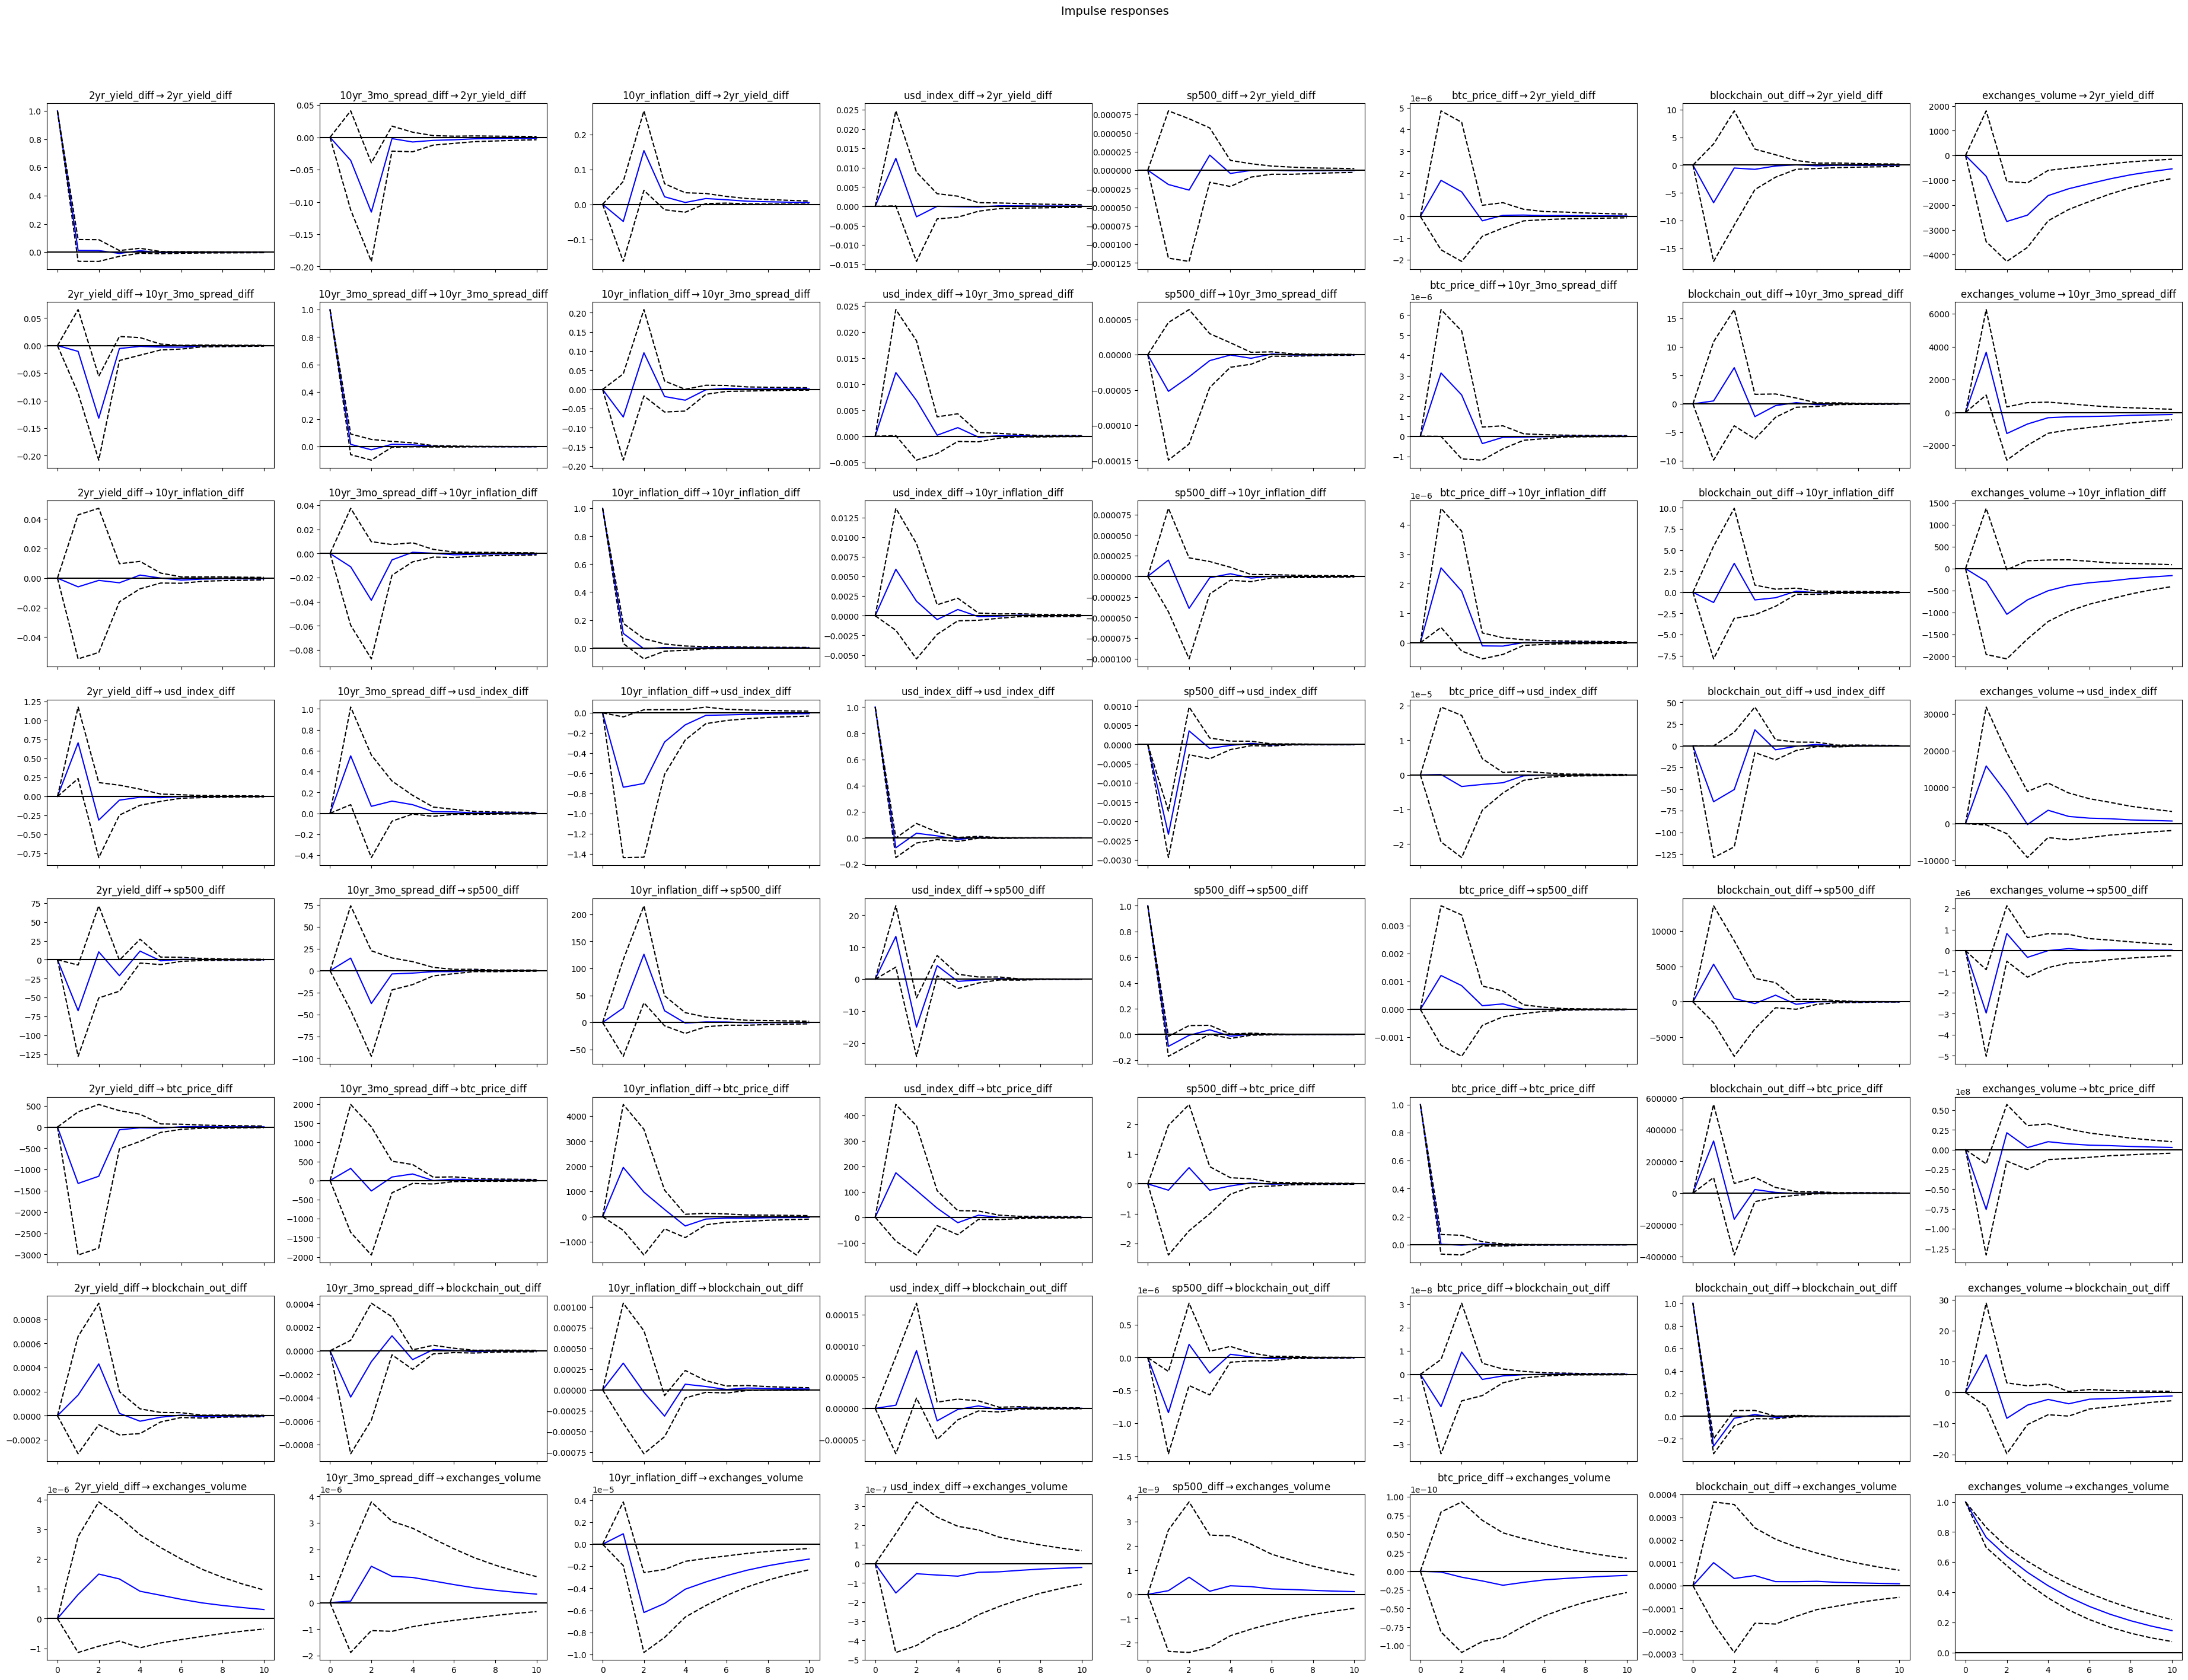

In [379]:
irf.plot(figsize=(40, 30))

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 60
test_result = grangercausalitytests(df_var[['blockchain_out_diff','exchanges_volume']], max_lag, verbose=True)

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0274  , p=0.8686  , df_denom=875, df_num=1
ssr based chi2 test:   chi2=0.0275  , p=0.8683  , df=1
likelihood ratio test: chi2=0.0275  , p=0.8683  , df=1
parameter F test:         F=0.0274  , p=0.8686  , df_denom=875, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3528  , p=0.0957  , df_denom=872, df_num=2
ssr based chi2 test:   chi2=4.7326  , p=0.0938  , df=2
likelihood ratio test: chi2=4.7198  , p=0.0944  , df=2
parameter F test:         F=2.3528  , p=0.0957  , df_denom=872, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8117  , p=0.0384  , df_denom=869, df_num=3
ssr based chi2 test:   chi2=8.5029  , p=0.0367  , df=3
likelihood ratio test: chi2=8.4619  , p=0.0374  , df=3
parameter F test:         F=2.8117  , p=0.0384  , df_denom=869, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7060  , p=0.0293  

In [ ]:
max_lag = 60
test_result = grangercausalitytests(df_var[['exchanges_volume',"blockchain_out_diff"]], max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3596  , p=0.5489  , df_denom=875, df_num=1
ssr based chi2 test:   chi2=0.3608  , p=0.5480  , df=1
likelihood ratio test: chi2=0.3608  , p=0.5481  , df=1
parameter F test:         F=0.3596  , p=0.5489  , df_denom=875, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2031  , p=0.8163  , df_denom=872, df_num=2
ssr based chi2 test:   chi2=0.4085  , p=0.8153  , df=2
likelihood ratio test: chi2=0.4084  , p=0.8153  , df=2
parameter F test:         F=0.2031  , p=0.8163  , df_denom=872, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3761  , p=0.7703  , df_denom=869, df_num=3
ssr based chi2 test:   chi2=1.1373  , p=0.7681  , df=3
likelihood ratio test: chi2=1.1366  , p=0.7683  , df=3
parameter F test:         F=0.3761  , p=0.7703  , df_denom=869, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4495  , p=0.7728  

/home/moises/.pyenv/versions/3.11.3/envs/research_btc/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


parameter F test:         F=0.5382  , p=0.8281  , df_denom=854, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.4400  , p=0.9136  , df_denom=851, df_num=9
ssr based chi2 test:   chi2=4.0481  , p=0.9082  , df=9
likelihood ratio test: chi2=4.0387  , p=0.9088  , df=9
parameter F test:         F=0.4400  , p=0.9136  , df_denom=851, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=0.4239  , p=0.9355  , df_denom=848, df_num=10
ssr based chi2 test:   chi2=4.3439  , p=0.9305  , df=10
likelihood ratio test: chi2=4.3331  , p=0.9311  , df=10
parameter F test:         F=0.4239  , p=0.9355  , df_denom=848, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=0.3829  , p=0.9629  , df_denom=845, df_num=11
ssr based chi2 test:   chi2=4.3261  , p=0.9594  , df=11
likelihood ratio test: chi2=4.3153  , p=0.9598  , df=11
parameter F test:         F=0.3829  , p=0.9629  , df_denom=845, df_num=11

Granger Ca